<span style="font-family:papyrus; font-size:5em;">
Astronomy Coding Project
<span>

<span style="font-family:papyrus; font-size:2em;">
Sophia Liu <br>
(07/11/2023)
<span>

## Summary of Program: 
This project will plot celestial bodies' distance from Earth year-round, and will allow the user to plug in a date to find the  distance of that celestial body from Earth on that date. I will start with nearby planets, then expand to include other bodies.

First body:
- the Moon

### Data Source: Moon

- https://www.fullmoonphase.com/moon-distance/2022

    - I will take values from 2022, 2023, and 2024 and connect the dots to create a function
    - I will allow users to plug in a date on the lines to find approximate distance

### Step 1: Import the Resources 
<!-- <span style="font-family:TimesNewRoman; font-size:1.5em;"> -->
- I imported data sets from the above source and converted them into lists of x and y. 
- I imported numpy, matplotlib.pyplot, markdown, random, and colorama to be used in the code.
- There are about two to three data points per month, reflecting the perigee (close) and apogee (far) states of the moon. 
    - The average distance of the Moon from the Earth year-round is about 238,855 miles (384,400 km) away. I also created a shadow list that provides conversions of miles to km, for the user's choice.
- In anticipation of a user being able to pick out a month, date, and year to find a specific distance, I have create a few functions throughout the code that use "np.random.choice()" as a way to substitue for a human user. 
<!-- </span> -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import markdown as md
import random
from colorama import Fore, Style

jan22_1 = 1
jan22_2 = 1 + 14/31
jan22_3 = 1 + 30/31
feb22_1 = 2 + 11/28
feb22_2 = 2 + 26/28
mar22_1 = 3 + 10/31
mar22_2 = 3 + 23/31
apr22_1 = 4 + 7/30
apr22_2 = 4 + 19/30
may22_1 = 5 + 5/31
may22_2 = 5 + 17/31
jun22_1 = 6 + 2/30
jun22_2 = 6 + 14/30
jun22_3 = 6 + 29/30
jul22_1 = 7 + 13/31
jul22_2 = 7 + 26/31
aug22_1 = 8 + 10/31
aug22_2 = 8 + 22/31
sep22_1 = 9 + 7/30
sep22_2 = 9 + 19/30
oct22_1 = 10 + 4/31
oct22_2 = 10 + 17/31
oct22_3 = 10 + 29/31
nov22_1 = 11 + 14/30
nov22_2 = 11 + 26/30
dec22_1 = 12 + 12/31
dec22_2 = 12 + 24/31

jan1 = 223766
jan2 = 253644
jan3 = 226398
feb1 = 253083
feb2 = 229851
mar1 = 252693
mar2 = 231078
apr1 = 252798
apr2 = 228200
may1 = 253323
may2 = 225178
jun1 = 253882
jun2 = 223393
jun3 = 254113
jul1 = 223292
jul2 = 253911
aug1 = 224900
aug2 = 253367
sep1 = 227821
sep2 = 252824
oct1 = 230849
oct2 = 252680
oct3 = 230200
nov1 = 253053
nov2 = 226777
dec1 = 253651
dec2 = 223924

x = [jan22_1, jan22_2, jan22_3, feb22_1, feb22_2, mar22_1, mar22_2, apr22_1, apr22_2, may22_1, may22_2, jun22_1, jun22_2, jun22_3, jul22_1, jul22_2, aug22_1, aug22_2, sep22_1, sep22_2, oct22_1, oct22_2, oct22_3, nov22_1, nov22_2, dec22_1, dec22_2]
y = [jan1, jan2, jan3, feb1, feb2, mar1, mar2, apr1, apr2, may1, may2, jun1, jun2, jun3, jul1, jul2, aug1, aug2, sep1, sep2, oct1, oct2, oct3, nov1, nov2, dec1, dec2]
kmyval = []
for i in y:
    float(i)
    kmyval.append(i * 1.60934)

### Step 2: Establish Months
- For the options of January through December, I placed those month names equal to their ascending numbers (ex. January = 1, December = 12). 
- I also created a string list of all the names of the months, called "monthstr", to be used later on. 
- Underneath those lists, there is another one called "monthlabel". This is pretty self-explanatory, it is a list of all the labels of the month names to be used on the graph. 

In [2]:
January = 1
Feburary = 2
March = 3
April = 4
May = 5
June = 6
July = 7
August = 8
September = 9
October = 10
November = 11
December = 12
monthstr = ["", "January", "Feburary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month = [January, Feburary, March, April, May, June, July, August, September, October, November, December] 
monthlabel = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

### Step 3: Month Links
 - After the function "monthval" uses "np.random.choice()" to randomly select a month name from "month", that name is converted to their specific ascending numbers, and in the next line that number is used as an index to the list "monthstr", set equal to the variable "corremonth". 
 - There is an empty element in "monthstr" placed exactly for this purpose- the index of a specific month will use that space as "0" and go on to select its matching month name string in "monthstr". 

In [3]:
monthval = np.random.choice(month)

corremonth = monthstr[monthval]

### Step 4: Establish Days
- Next, I defined the sizes and boundaries of the months and days. 
- If a month were January, March, May, July, August, October, or December, then I declared that the days were in the range of 1 to 32. 
    - There are not actually 32 days- the last number is always non-inclusive. Therefore the program reads those months as having 31 days.
- For the month of Feburary, there are 28 days, 29 on a leap year. 

In [4]:
if month == 1 or 3 or 5 or 7 or 8 or 10 or 12:
    day = [I for I in range(1, 32)] #numpy range
elif month == 2:
    day = [I for I in range(1, 29)]
elif month == 4 or 6 or 9 or 11:
    day = [I for I in range(1, 31)] #remember leap year = 2024

### Step 5: Link Days
- I then used the varibale "dayval" to make a random choice of day from the month that defined it in the above "if" statement. 
- Next, I created a variable named "daylim" to be the maximum value of "day", which would be differently depending on which month had been chosen previously. 
- I then created a variable called "value" to be the random month number plus the random day divided by the day limit. 
    - This mirrors the format of the x-points I imported from my source. 
- Next, I created a varible called "xinterp" that would return the y-value, or distance, for the random time of year that had been selected. "xinterp" would locate the position of "value" on the graph, then return the y-value distance that corresponded to the x. 
- Next, I added specific suffixes for each number in the variable "dayprint". For instance, the first day of a month would be the 1st, and the second the 2nd, and so on.

In [5]:
dayval = np.random.choice(day)

daylim = max(day)

value = monthval + dayval/daylim #make func with inputs

xinterp = np.interp(value,x,y) #this returns the y-value for the "value", which is the distance

if dayval == 1 or dayval == 21 or dayval == 31: #list comprehension
    dayprint = str(dayval) + "st"
elif dayval == 2 or dayval == 22:
    dayprint = str(dayval) + "nd"
elif dayval == 3 or dayval == 23:
    dayprint = str(dayval) + "rd"
else:
    dayprint = str(dayval) + "th"

### Step 6: Selection Library
- Next, I created three lists that will be fleshed in later. 
- They act as libraries and allow users to select what object and what year they want the distance value from, as well as if they want the distance to be represented in miles or kilometers. 
    - For the object and year, right now the only choices are the Moon and 2022. 

In [6]:
object = ["Moon"]
inputobject = np.random.choice(object)

year = [2022]
inputyear = np.random.choice(year)

metric = ["Miles", "Kilometers"]
inputmetric = np.random.choice(metric)
kmdistance = xinterp * 1.60934

#or use if statement for kmylist append


### Step 7: Graphing
- Finally, I graphed all the data points, and you can see on the graph a black star that represents the chosen day. 
- I also printed a string that tells you the specific day that was chosen and the specific distance that corresponds with the day. 

The distance of the Moon from the Earth on July 5th, 2022 was 387629.11866622325 kilometers.


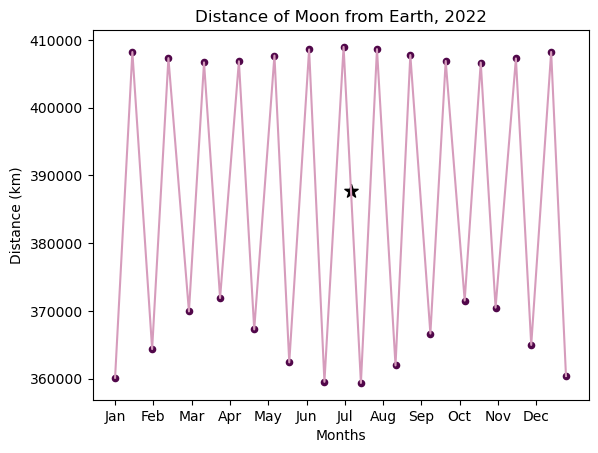

In [7]:
if inputobject == "Moon":
    if inputyear == 2022:
        if inputmetric == "Miles":
            print(Fore.CYAN + "The distance of the Moon from the Earth on {a} {b}, {c} was {d} miles.".format(a = str(corremonth), b = str(dayprint), c = str(inputyear), d = str(xinterp)))
            plt.figure
            plt.scatter(x,y,c = "#51074a", s = 20)
            plt.plot(x,y,c = "#d69cbc")
            plt.scatter(value,xinterp,marker = "*", facecolor = "g", s = 100, c = "k")
            plt.xlabel("Months")
            plt.ylabel("Distance (miles)")
            plt.xticks(month,monthlabel)
            #plt.yticks(min(y),max(y))
            #plt.xticks(np.arange(min(x), max(x), 1.0))
            plt.title("Distance of Moon from Earth, 2022")
            plt.show()
        if inputmetric == "Kilometers":
            print(Fore.CYAN + "The distance of the Moon from the Earth on {a} {b}, {c} was {d} kilometers.".format(a = str(corremonth), b = str(dayprint), c = str(inputyear), d = str(kmdistance)))
            plt.figure
            plt.scatter(x,kmyval,c = "#51074a", s = 20)
            plt.plot(x,kmyval,c = "#d69cbc")
            plt.scatter(value,kmdistance,marker = "*", facecolor = "g", s = 100, c = "k")
            plt.xlabel("Months")
            plt.ylabel("Distance (km)")
            plt.xticks(month,monthlabel)
            #plt.yticks(min(y),max(y))
            #plt.xticks(np.arange(min(x), max(x), 1.0))
            plt.title("Distance of Moon from Earth, 2022")
            plt.show()


## Future Plans...
- markdown
- function/interface/provide other options (2023/2024 and other celestial objects)
- fix y labels
- legend on plot, show point coordinates?
- get points to overlap lines
- organize project (conclusion, etc.)
- print text bigger
- star distictiveness
- option for direct choices
- add toggle for same date between km and miles
- light years metric function


<span style="font-family:papyrus; font-size:3em;">
Thank you for reading!
<span> 
<br>
<span style="font-family:papyrus; font-size:1em;">
        ~Sophia
<span>